# Rendu Hipeau Kévin 

In [22]:
#importation des librairies 

import matplotlib
%matplotlib inline
import csv as csv 
import numpy as np
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
import pandas as pd
from __future__ import division
import re
from sklearn.linear_model import LinearRegression



Tout d'abord je vais recuperer le csv et l'ajouter dans ma variable data

In [23]:
data_all = []
#recuperation  du csv
with open('train.csv') as train_file:
    csv_reader = csv.reader(train_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        data_all.append(row)
data_all = np.array(data_all)
#ajout des données dans data
data = data_all[1::]

J'affiche ensuite le nombre de lignes et de colonnes ainsi que les 3 dernieres lignes de mon csv

In [24]:
print data[len(data)-3::1]#on affiche les 3 dernieres lignes 
print("Nombre de lignes " + str(len(data)))
print("Nombre de colonnes " +str(len(data[0])))

[['889' '0' '3' 'Johnston, Miss. Catherine Helen "Carrie"' 'female' '' '1'
  '2' 'W./C. 6607' '23.45' '' 'S']
 ['890' '1' '1' 'Behr, Mr. Karl Howell' 'male' '26' '0' '0' '111369' '30'
  'C148' 'C']
 ['891' '0' '3' 'Dooley, Mr. Patrick' 'male' '32' '0' '0' '370376' '7.75'
  '' 'Q']]
Nombre de lignes 891
Nombre de colonnes 12


Je vais ensuite utiliser la librairie panda pour recuperer mes données du csv. 

In [25]:
df = pd.read_csv('train.csv', header=0)
print df #on peut voir que mon fichier est bien importé

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

Je veux maintenant voir le nombre de mort en fonction de la lettre des Cabine 

In [26]:
#Cette methode me permet de recuperer toute les cabines et les morts/survivant associes à aux groupes cabines (A,B,C,etc)
#elle me retourne un dictionnaire la clef est la lettre de la cabine
def getCabin(survive):
    typeCabin = [];
    cabinArray = {}
    cabinArray["other"]= 0
    for passenger in range(1,len(df[(df['Survived'] == survive)])):#on parcours les passagers surviants ou non
        cabin =  str(df.iloc[[passenger]]["Cabin"].item())     
        if cabin[0][0] is not "n" : #si la valeur n'est pas à NaN un null numerique  
            if cabin[0][0] not in typeCabin: #si le groupe de cabine n'est pas deja dans la dictionnaire on la creer 
                cabinArray[cabin[0]] = 1
                typeCabin.append(cabin[0])
            else:
                 cabinArray[cabin[0]] = cabinArray[cabin[0]] +1 #on ajoute la personne au groupe de cabine trouvé
        else:# si la personne n'a pas de cabine
            cabinArray["other"] = cabinArray["other"] +1 
    return cabinArray

On recupere les groupes de cabines grace à notre methode

In [27]:
cabinSurvive = getCabin(True)
cabinNoSurvive = getCabin(False)
print cabinSurvive
print cabinNoSurvive

{'A': 6, 'C': 29, 'B': 14, 'E': 9, 'D': 12, 'G': 3, 'F': 7, 'other': 260, 'T': 1}
{'A': 8, 'C': 43, 'B': 25, 'E': 17, 'D': 18, 'G': 4, 'F': 9, 'other': 423, 'T': 1}


Affichage des resulats dans un camembert !
Je vais ajouter chaque lettre de cabine à un tableau letter et chaque nombre de personnes dans un autre tableau je separe mes clefs et mes valeurs du dictionaire

In [28]:
letter = []
number = []
numberletter = []
i = 1
#pour les non survivants 
for key in cabinNoSurvive:
    numberletter.append(i)
    i = i+1
    letter.append(str(key))
    number.append(cabinNoSurvive[key] / (cabinNoSurvive[key] +cabinSurvive[key])*100)
    print str(key) +"  " + str(cabinNoSurvive[key] / (cabinNoSurvive[key] +cabinSurvive[key])*100 )
    



A  57.1428571429
C  59.7222222222
B  64.1025641026
E  65.3846153846
D  60.0
G  57.1428571429
F  56.25
other  61.9326500732
T  50.0


On creer et affiche les diagrammes pour non survivants

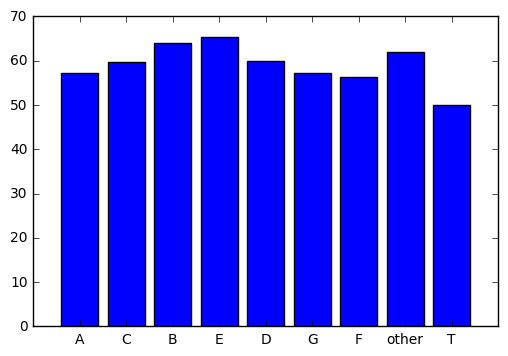

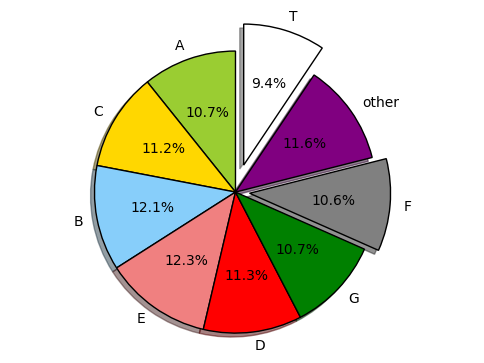

In [29]:
#on affiche un diagrame en bar dans un premier temps
plt.bar(numberletter, number, align='center')
plt.xticks(numberletter, letter)
plt.show()

#on affiche ensuite un diagrame en camenbert
explode = (0, 0, 0, 0, 0,0, 0.1, 0, 0.2) 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','grey','purple','white']
plt.pie(number, explode=explode, labels=letter, autopct='%1.1f%%', startangle=90, shadow=True,colors=colors)
plt.axis('equal')
plt.show()


Je fais la meme chose pour les survivants

A  42.8571428571
C  40.2777777778
B  35.8974358974
E  34.6153846154
D  40.0
G  42.8571428571
F  43.75
other  38.0673499268
T  50.0


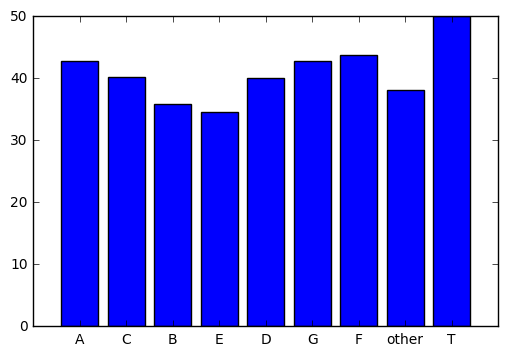

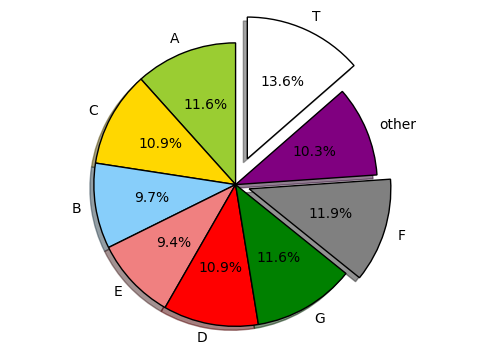

In [30]:
letter = []
number = []
numberletter = []
i = 1
#pour les non survivants 
for key in cabinSurvive:
    numberletter.append(i)
    i = i+1
    letter.append(str(key))
    number.append(cabinSurvive[key] / (cabinNoSurvive[key] +cabinSurvive[key])*100)
    print str(key) +"  " + str(cabinSurvive[key] / (cabinNoSurvive[key] +cabinSurvive[key])*100 )
    
#on affiche un diagrame en bar dans un premier temps
plt.bar(numberletter, number, align='center')
plt.xticks(numberletter, letter)
plt.show()

#on affiche ensuite un diagrame en camenbert
explode = (0, 0, 0, 0, 0,0, 0.1, 0, 0.2) 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','grey','purple','white']
plt.pie(number, explode=explode, labels=letter, autopct='%1.1f%%', startangle=90, shadow=True,colors=colors)
plt.axis('equal')
plt.show()

Nous pouvons en deduire qu'il y a eu plus de survivant dans les cabines de type E et T.


### Je vais maintenant voir si le ticket est pair ou impair  il y a plus de chance de survivre

In [31]:
#Cette méthode va me servire à recuperer le nombre de survivant ou de noyés ayant un nombre pair ou impaire
def getNbPairImpair(survive): 
    nbPair =0
    nbImpair = 0
    for i in range(1,len(df[df["Survived"] == survive])):
        if re.search(r'\d+',df.iloc[[i]]["Ticket"].item()) is not None:#je verifie si le ticket n'est pas null
            if int(re.search(r'\d+',df.iloc[[i]]["Ticket"].item()).group()) % 2 == 0:#je recherche les numeros dans le ticket 
                nbPair = nbPair +1
            else:
                nbImpair = nbImpair +1
    return (nbPair,nbImpair)#je retourne un tuple avec les nombres pairs ou impairs

In [32]:
nbPairSurvive =0
nbImpairSurvive = 0
nbPairDead = 0
nbImpairDead = 0

retSurvive = getNbPairImpair(1)# je regarde le nombre de survivant
nbPairSurvive = retSurvive[0]#je recupere la partie pair
nbImpairSurvive = retSurvive[1]# la partie impair


Je vais afficher un graphique pour comparer le nombre de survivant et les noyés en fonction du nombre pair ou impair

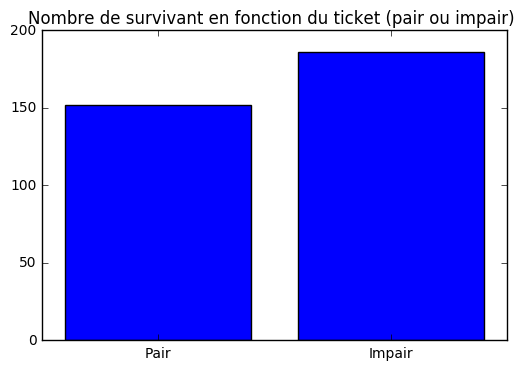

In [33]:
letter = ["Pair","Impair"]
number = [nbPairSurvive,nbImpairSurvive]
numberletter = [1,2]

plt.bar(numberletter, number, align='center')
plt.xticks(numberletter, letter)
plt.title("Nombre de survivant en fonction du ticket (pair ou impair) ")
plt.show()

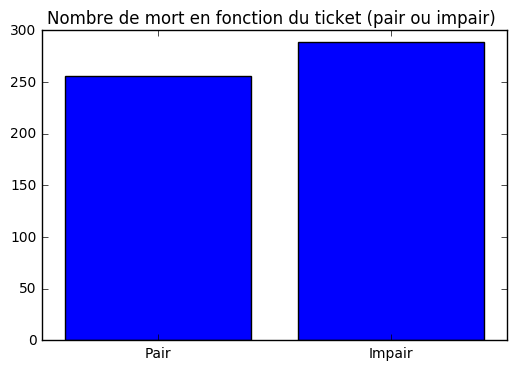

In [34]:
retDead = getNbPairImpair(0)
nbPairDead = retDead[0]
nbImpairDead = retDead[1]
number = [nbPairDead,nbImpairDead]
plt.bar(numberletter, number, align='center')
plt.xticks(numberletter, letter)
plt.title("Nombre de mort en fonction du ticket (pair ou impair) ")
plt.show()


In [35]:
nbSurvivePerParch = {} #Je crée un dictionnaire

for x in range(1,len(df[ (df['Survived'] == 1)])): #je parcour toute les personnes survivantes
    if df.iloc[[x]]["Parch"].item() < 7: 
        nbParch =df.iloc[[x]]["Parch"].item()#je prends l'entourage de la personne
        if nbParch not in nbSurvivePerParch:
            nbSurvivePerParch[nbParch] = 1 #si l'entourage n'est pas connu je le crée 
        else:
            nbSurvivePerParch[nbParch] = nbSurvivePerParch[nbParch] +1
print nbSurvivePerParch

{0L: 255, 1L: 47, 2L: 35, 3L: 1, 4L: 1, 5L: 2}


Je separe les clefs et les valeurs de mon dictionnaire

In [36]:
nbPersonn = []
nbHave = []

for key in nbSurvivePerParch:
    nbHave.append([str(key)])
    nbPersonn.append([nbSurvivePerParch[key]])

J'affiche le graphique

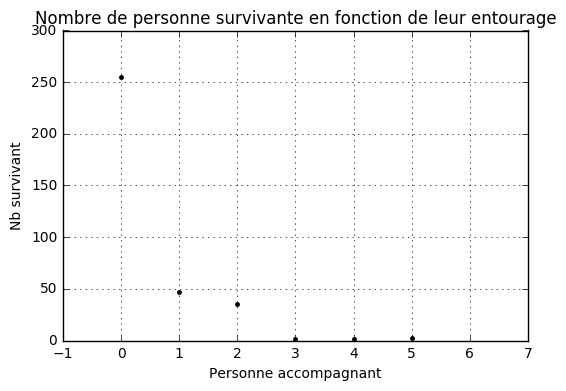

In [37]:
%matplotlib inline
plt.figure()
plt.title('Nombre de personne survivante en fonction de leur entourage')
plt.ylabel('Nb survivant')
plt.xlabel(u'Personne accompagnant')
plt.plot(nbHave,nbPersonn, 'k.')
plt.axis([-1, 7, 0, 300])
plt.grid(True)
plt.show()

On peut voir la majeur partie des personnes survivante ont peut d'entourage

Nettoyage des données (Age)

In [38]:
# Ajouter une colonne :
df['Gender'] = 4

# Peut-être avec des valeurs plus intéressantes :
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

# Ou binaire :
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)
# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & 
                (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]


## Relation entre la classe et l'age

In [39]:
model = LinearRegression()
age = df[df["AgeFill"] > 18]['AgeFill'].to_frame()
classe = df[df["AgeFill"] > 18]['Pclass'].to_frame()
model.fit(y, X)
for i in range(1,4):
        print('La personne de class'+str(i)+ ' a un age de {px:.2f}'.format(
        px=model.predict([[i]])[0][0]))

NameError: name 'y' is not defined

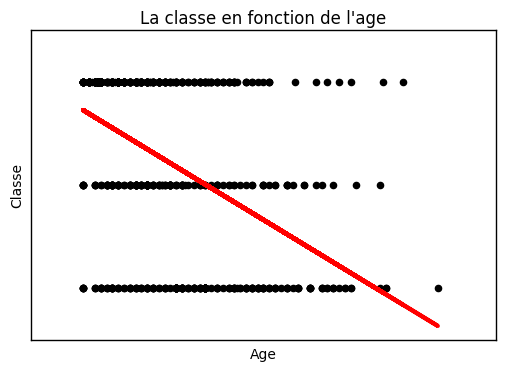

La variance est de: 0.21


In [40]:

age = df[df["AgeFill"] > 18]['AgeFill'].to_frame()
classe = df[df["AgeFill"] > 18]['Pclass'].to_frame()
regr = linear_model.LinearRegression()
regr.fit(age, classe)
plt.title('La classe en fonction de l\'age')
plt.xlabel('Age')
plt.ylabel('Classe')
plt.scatter(age, classe,  color='black')
plt.grid(True)
plt.plot(age, regr.predict(age), color='red',
         linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
print('La variance est de: %.2f' % regr.score(age, classe))


In [41]:

model = LinearRegression()
age = df[df["AgeFill"] > 18]['AgeFill'].to_frame()
tarif = df[df["AgeFill"] > 18]['Fare'].to_frame()
model.fit(y, X)

NameError: name 'y' is not defined

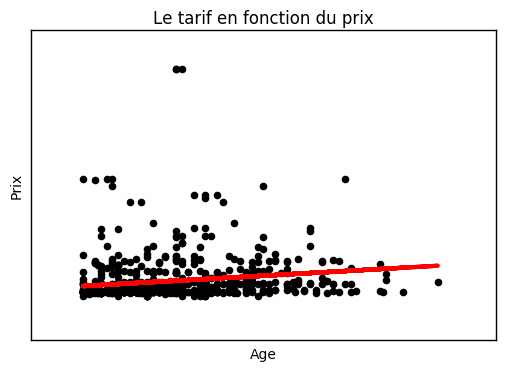

La variance est de: -1340.20


In [42]:
age = df[df["AgeFill"] > 18]['AgeFill'].to_frame()
tarif = df[df["AgeFill"] > 18]['Fare'].to_frame()
regr = linear_model.LinearRegression()
regr.fit(age, tarif)

plt.title('Le tarif en fonction du prix')
plt.xlabel('Age')
plt.ylabel('Prix')
plt.scatter(age, tarif,  color='black')
plt.grid(True)
plt.plot(age, regr.predict(age), color='red',
         linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
print('La variance est de: %.2f' % regr.score(age, classe))

In [43]:
df['FamilySize'] = df['SibSp'] + df['Parch']
print df.FamilySize

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: FamilySize, dtype: int64
